# Audible App Machine Learning Predictions

In [22]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import sklearn

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Dataset: dataset_Exploded.csv¶

Initial Source: Rohit Dass (6/14/2021). "Audible Dataser", https://www.kaggle.com/rohitdass/audible-dataset.

Description: Initial full dataset for audible dataset recommendation engine. Total books 2200+(Including Duplicates).
             Then, using pandas 100 random human demographics were generated and merged to the initial source. The                          generated demographics were then merged to the initial source to create the "dataset_Exploded" dataset. After this              final dataset was cleaned. 

Variables/Columns GENDER: Gender Male or Female AGE: Age Range 18-75 ZIP CODE: random 5 digit in 80201,80239 range INCOME: <200000K



In [23]:
# Read the csv file into a pandas DataFrame

audible= pd.read_csv('dataset_Exploded.csv')
audible.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Categories Encoded,Rating,Total No. of Ratings,Price,Review,Gender,Age,Income,ZipCode,Profession
0,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,67,102000,80207,Industrial Engineer
1,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,67,102000,80236,Electrical Engineer
2,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,65,111200,80217,Nurse Practitioner
3,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Male,52,107040,80226,Physician Assistant
4,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Male,50,116000,80229,Computer Hardware Engineer


In [24]:
# categories_df = {'Categories':['Biographies & Memoirs','Science Fiction & Fantasy','History',
#                                      'Mystery, Thriller & Suspense', 'Romance', 'Politics & Social Sciences',
#                                      'Literature & Fiction', 'Health & Wellness', 'Arts & Entertainment', 
#                                      'Business & Careers', 'Computers & Technology', 'Education & Learning',
#                                      'Erotica', 'Home & Garden', 'LGBTQ+', 'Money & Finance',
#                                      'Relationships, Parenting & Personal Development', 'Religion & Spirituality', 
#                                      'Science & Engineering', 'Teen', 'Travel & Tourism']}

# df =pd.DataFrame(categories_df,columns=["Categories"])

# # create object of Ordinalencoding
# categories_dict= ce.OrdinalEncoder(cols=['Categories'],return_df=True,
#                            mapping=[{'col':'Categories',
#                                      'mapping':{'Biographies & Memoirs':1,'Science Fiction & Fantasy':2,'History':3,
#                                                 'Mystery, Thriller & Suspense':4, 'Romance': 5, 'Politics & Social Sciences':6, 
#                                                 'Literature & Fiction': 7, 'Health & Wellness': 8, 'Arts & Entertainment': 9,
#                                                 'Business & Careers': 10, 'Computers & Technology':11, 'Education & Learning': 12, 
#                                                 'Erotica': 13, 'Home & Garden': 14, 'LGBTQ+': 15, 'Money & Finance': 16, 'Relationships, Parenting & Personal Development': 17, 
#                                                 'Religion & Spirituality': 18, 'Science & Engineering': 19, 'Teen': 20, 'Travel & Tourism':21}}])

# categories_dict

# {'Biographies & Memoirs':1,'Science Fiction & Fantasy':2,'History':3,'Mystery, Thriller & Suspense':4, 'Romance': 5, 'Politics & Social Sciences':6,
#  'Literature & Fiction': 7, 'Health & Wellness': 8, 'Arts & Entertainment': 9,
#  'Business & Careers': 10, 'Computers & Technology':11, 'Education & Learning': 12, 
#  'Erotica': 13, 'Home & Garden': 14, 'LGBTQ+': 15, 'Money & Finance': 16, 'Relationships, Parenting & Personal Development': 17, 
#  'Religion & Spirituality': 18, 'Science & Engineering': 19, 'Teen': 20, 'Travel & Tourism':21}

# temp
# {'categories_df': ['Biographies & Memoirs':1,'Science Fiction & Fantasy':2,'History':3,'Mystery, Thriller & Suspense':4,'Romance': 5,'Politics & Social Sciences':6,'Literature & Fiction': 7, 'Health & Wellness': 8, 'Arts & Entertainment': 9,'Business & Careers': 10, 'Computers & Technology':11, 'Education & Learning': 12, 'Erotica': 13, 'Home & Garden': 14, 'LGBTQ+': 15, 'Money & Finance': 16, 'Relationships, Parenting & Personal Development': 17, 'Religion & Spirituality': 18, 'Science & Engineering': 19, 'Teen': 20, 'Travel & Tourism':21]}
# df

In [37]:
# Use dummies encoded to create binary data from gender
#data = X.copy()
audible = pd.get_dummies(audible, columns=["Gender", "Review", "Profession"])
audible

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Categories Encoded,Rating,Total No. of Ratings,...,Profession_Public Relations Specialist,Profession_Real Estate Broker,Profession_Real Estate Sales Agent,Profession_Registered Nurse,Profession_Security Guard,Profession_Software Developer,Profession_Speech-Language Pathologist,Profession_Warhouse Packer,Profession_Welder,Profession_Wholesale
0,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
1,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
2,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
3,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
4,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192795,Travels with Charley in Search of America,NaN,John Steinbeck,Gary Sinise,7 hrs and 58 mins,Unabridged Audiobook,Travel & Tourism,22,4.6,4254,...,0,0,0,0,0,0,0,0,0,0
192796,Travels with Charley in Search of America,NaN,John Steinbeck,Gary Sinise,7 hrs and 58 mins,Unabridged Audiobook,Travel & Tourism,22,4.6,4254,...,0,0,0,0,0,0,0,0,0,0
192797,Travels with Charley in Search of America,NaN,John Steinbeck,Gary Sinise,7 hrs and 58 mins,Unabridged Audiobook,Travel & Tourism,22,4.6,4254,...,0,0,0,0,0,0,0,0,0,0
192798,Travels with Charley in Search of America,NaN,John Steinbeck,Gary Sinise,7 hrs and 58 mins,Unabridged Audiobook,Travel & Tourism,22,4.6,4254,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Drop extra dummy columns
audible= audible.drop(columns=['Gender_Male'])
feature_names = audible.columns
audible.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Categories Encoded,Rating,Total No. of Ratings,...,Profession_Public Relations Specialist,Profession_Real Estate Broker,Profession_Real Estate Sales Agent,Profession_Registered Nurse,Profession_Security Guard,Profession_Software Developer,Profession_Speech-Language Pathologist,Profession_Warhouse Packer,Profession_Welder,Profession_Wholesale
0,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
1,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
2,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
3,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
4,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Set features. This will also be used as your x values.
selected_features = audible1[['Rating', 'Total No. of Ratings', 'Price',
       'Age', 'Income', 'ZipCode', 'Gender_Female']]
X_values= selected_features
X_values.head()
print(X_values.shape)

(192800, 7)


In [42]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories Encoded"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [43]:
# ce_OHE = ce.OneHotEncoder(cols=['Categories']) 

# ce_OHE
# OneHotEncoder(columns=['Categories'])
# data1 = ce_OHE.fit_transform(audible)
# data1.head()

# # Scaling and Normalization

In [44]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
88060,0,63,4.7,578,80207
149236,1,34,4.7,827,80235
182113,0,48,4.6,21924,80203
67646,1,45,4.8,82,80234
84065,0,42,4.9,13,80232


In [45]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [46]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [47]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

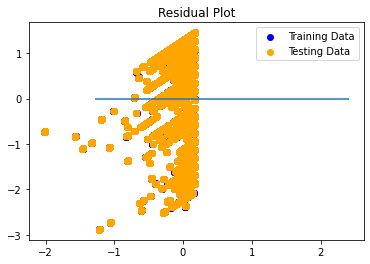

In [48]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [49]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9645644948263469, R2: 0.03069576141242436


k: 1, Train/Test Score: 0.992/0.193
k: 3, Train/Test Score: 0.498/0.190
k: 5, Train/Test Score: 0.429/0.194
k: 7, Train/Test Score: 0.391/0.202
k: 9, Train/Test Score: 0.364/0.207
k: 11, Train/Test Score: 0.345/0.210
k: 13, Train/Test Score: 0.332/0.213
k: 15, Train/Test Score: 0.322/0.217
k: 17, Train/Test Score: 0.314/0.218
k: 19, Train/Test Score: 0.307/0.220


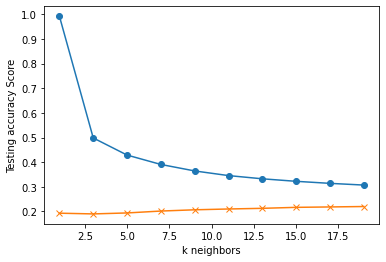

In [50]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [60]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.218


In [59]:
# Calculate classification report
from sklearn.metrics import classification_report

target = audible["Rating"]
target_names = ["negative", "positive"]

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

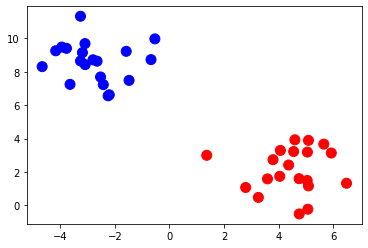

In [61]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()